# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from **scratch instead of using any pre-existing libraries** to do so:

(1) Count the frequency of all the N-grams (N=3) and (N=2).

(2) Calculate the probabilities for all the bigrams in the dataset by using the formula  count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative
probabilities of each review in terms of other reviews (abstracts, or tweets) by using the formula  frequency (noun phrase) / max frequency (noun phrase) on the whole dataset.

Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [2]:
# Write your code here
#Importing libraries
!pip install nltk
import nltk
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import numpy as np
from collections import Counter
import math


from sklearn.feature_extraction.text import CountVectorizer

from nltk import pos_tag, word_tokenize
from nltk.chunk import ne_chunk
from nltk.tree import Tree
from nltk.corpus import stopwords
import nltk

from nltk.stem import PorterStemmer, WordNetLemmatizer
import re

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [4]:
df= pd.read_csv("/content/Twitter.csv")
df.head()

,Tweet_ID,Username,Created_At,Text
0,1891678317633315207,user_1891022278533709824,2025-02-18 02:37:11+00:00,@stellardeployer @Ashcryptoreal @pumpdotfun @f...
1,1891678309819301954,user_1849144255274713088,2025-02-18 02:37:09+00:00,Rain Girl \n#雨水 #ai #aiart #aigirl #aiwomen #a...
2,1891678288025718879,user_1422938193339420682,2025-02-18 02:37:04+00:00,Abridge @AbridgeHQ Raises $250 Million in Seri...
3,1891678273496662092,user_1748991548455563264,2025-02-18 02:37:00+00:00,Bullish\nAwesome\n\n@Ammo_AI #AI #ammo
4,1891678257667318099,user_1517080755356065795,2025-02-18 02:36:56+00:00,"@Ammo_AI #AI #ammo \nThis is a great project, ..."


In [5]:
# Function to preprocess and clean review
def review_preprocessing(Text):
    # Remove punctuation and special characters
    Text = ''.join([character for character in Text if character not in string.punctuation])

    # Remove numbers
    Text = ''.join([character for character in Text if not character.isdigit()])

    # Tokenize the review
    words = nltk.word_tokenize(Text)

    # Remove stopwords
    words = [w for w in words if w.lower() not in stopwords.words('english')]

    # Lowercase all words
    words = [w.lower() for w in words]

    # Remove specific unwanted words
    unwanted_words = ["雨水", "美女", "aiグラビア", "aiモデル", "aiガール", "画像生成"]
    words = [w for w in words if w not in unwanted_words]

    # Remove non-alphabetic characters
    words = [w for w in words if w.isalpha()]

    # Stemming
    stemmer = PorterStemmer()
    words = [stemmer.stem(w) for w in words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(w) for w in words]

    # Join the words back into a cleaned sentence
    cleaned_user_reviews = ' '.join(words)

    return cleaned_user_reviews

# Apply the preprocessing function to the 'Text' column of the DataFrame
df['Cleaned_Text'] = df['Text'].apply(review_preprocessing)

In [6]:
df

,Tweet_ID,Username,Created_At,Text,Cleaned_Text
0,1891678317633315207,user_1891022278533709824,2025-02-18 02:37:11+00:00,@stellardeployer @Ashcryptoreal @pumpdotfun @f...,stellardeploy ashcryptor pumpdotfun fourmem el...
1,1891678309819301954,user_1849144255274713088,2025-02-18 02:37:09+00:00,Rain Girl \n#雨水 #ai #aiart #aigirl #aiwomen #a...,rain girl ai aiart aigirl aiwomen aiphoto aiph...
2,1891678288025718879,user_1422938193339420682,2025-02-18 02:37:04+00:00,Abridge @AbridgeHQ Raises $250 Million in Seri...,abridg abridgehq rais million seri ai generati...
3,1891678273496662092,user_1748991548455563264,2025-02-18 02:37:00+00:00,Bullish\nAwesome\n\n@Ammo_AI #AI #ammo,bullish awesom ammoai ai ammo
4,1891678257667318099,user_1517080755356065795,2025-02-18 02:36:56+00:00,"@Ammo_AI #AI #ammo \nThis is a great project, ...",ammoai ai ammo great project hope project deve...
...,...,...,...,...,...
95,1891676626863128941,user_1805824389130469377,2025-02-18 02:30:28+00:00,🧑‍⚖️ A judge expressed concern over Elon Musk'...,judg express concern elon musk team action fed...
96,1891676625793601556,user_1679171410290262026,2025-02-18 02:30:27+00:00,Let’s go $bad community HOLD SO WE CAN 🔥 tell...,let go bad commun hold tell everyon know badid...
97,1891676623973363776,user_1696399163792220162,2025-02-18 02:30:27+00:00,@elonmusk Tax dollars saved? More like AI dat...,elonmusk tax dollar save like ai data earn pub...
98,1891676620240351446,user_1749422020469850112,2025-02-18 02:30:26+00:00,@theallinpod Economic &amp; military supremacy...,theallinpod econom amp militari supremaci soun...


(1) Count the frequency of all the N-grams (N=3) and (N=2).

In [7]:
#N=2

# Getting the 'Cleaned_Text' column off
text = df['Cleaned_Text']

# Construct an instance of the CountVectorizer class for use in N-gram analysis (N = 2).
ngram_vect = CountVectorizer(ngram_range=(2, 2))

# Fit and transform
ngram_mat = ngram_vect.fit_transform(text)

# Total all of the counts of each N-gram for all of the text.
ngram_counts = ngram_mat.sum(axis=0).A1

# Extract the bigrams
bigrams = ngram_vect.get_feature_names_out()

# Make a DataFrame to show the outcomes of the experiment.
output_df = pd.DataFrame({'Bigram': bigrams, 'Frequency': ngram_counts})

# Arrange the DataFrame's columns in descending order of frequency.
output_df = output_df.sort_values(by='Frequency', ascending=False)

# Printing output
output_df

,Bigram,Frequency
37,ai ammo,19
139,ammoai ai,18
43,ai data,9
491,great project,9
827,project develop,8
...,...,...
427,fintech metavers,1
428,first decentr,1
429,fix pakistan,1
430,follow like,1


In [8]:
#N=3
# Getting the 'Cleaned_Text' column off
text = df['Cleaned_Text']

# Construct an instance of the CountVectorizer class for use in N-gram analysis (N = 3).
ngram_vect = CountVectorizer(ngram_range=(3, 3))

# Fit and transform
ngram_mat = ngram_vect.fit_transform(text)

# Total all of the counts of each N-gram for all of the text.
ngram_counts = ngram_mat.sum(axis=0).A1

# Extract the trigrams
trigrams = ngram_vect.get_feature_names_out()

# Make a DataFrame to show the outcomes of the experiment.
output_df = pd.DataFrame({'Trigram': trigrams, 'Frequency': ngram_counts})

# Arrange the DataFrame's columns in descending order of frequency.
output_df = output_df.sort_values(by='Frequency', ascending=False)

# Printing output
output_df

,Trigram,Frequency
145,ammoai ai ammo,18
523,hope project develop,8
487,great project hope,8
815,project hope project,8
139,ammo great project,7
...,...,...
416,fbr desper revenu,1
417,featur cost usag,1
418,feb gempad part,1
419,feder agenc elonmusk,1


(2) Calculate the probabilities for all the bigrams in the dataset by using the formula  count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

In [9]:
text = df['Cleaned_Text']


# Construct an instance of the CountVectorizer class for bigram analysis (N=2)
bigram_vect = CountVectorizer(ngram_range=(2, 2))
# Fit and transform
bigram_mat = bigram_vect.fit_transform(text)
# Obtain the names of the features  (bigrams)
bigrams = bigram_vect.get_feature_names_out()
#Total all of the counts of each bigram for all of the text.
bigram_counts = bigram_mat.sum(axis=0).A1
# Making a DataFrame to keep track of the bigram counts.
bigram_df = pd.DataFrame({'Bigram': bigrams, 'Count': bigram_counts})

# Apply the formula count(w2 w1) / count(w2) to arrive at the probability.
bigram_df['Probability'] = bigram_df['Count'] / bigram_df['Count'].groupby(bigram_df['Bigram'].str.split().str[1]).transform('sum')

#printing output
bigram_df[['Bigram', 'Probability']]

,Bigram,Probability
0,abridg abridgehq,1.000000
1,abridgehq rais,0.500000
2,abstractchain live,1.000000
3,access artifici,1.000000
4,account hack,0.272727
...,...,...
1171,your wait,1.000000
1172,zkcrossnetwork alphaneur,1.000000
1173,アニメ aiアニメ,1.000000
1174,画像生成ai tryart,1.000000


3) Extract all the noun phrases and calculate the relative
probabilities of each review in terms of other reviews (abstracts, or tweets) by using the formula  frequency (noun phrase) / max frequency (noun phrase) on the whole dataset.

Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [10]:
text = df['Cleaned_Text']
text

,Cleaned_Text
0,stellardeploy ashcryptor pumpdotfun fourmem el...
1,rain girl ai aiart aigirl aiwomen aiphoto aiph...
2,abridg abridgehq rais million seri ai generati...
3,bullish awesom ammoai ai ammo
4,ammoai ai ammo great project hope project deve...
...,...
95,judg express concern elon musk team action fed...
96,let go bad commun hold tell everyon know badid...
97,elonmusk tax dollar save like ai data earn pub...
98,theallinpod econom amp militari supremaci soun...


In [11]:
import nltk
import pandas as pd
from collections import defaultdict
nltk.download('averaged_perceptron_tagger_eng')



# Function to extract noun phrases using chunking
def extract_noun_phrases(text):
    words = nltk.word_tokenize(text)
    pos_tags = nltk.pos_tag(words)
    chunk_pattern = r'NP: {<DT>?<JJ>*<NN.*>+}'
    chunk_parser = nltk.RegexpParser(chunk_pattern)
    chunks = chunk_parser.parse(pos_tags)
    noun_phrases = [' '.join(leaf[0] for leaf in tree.leaves()) for tree in chunks if hasattr(tree, 'label') and tree.label() == 'NP']
    return noun_phrases

# Extract noun phrases for each review
df['Noun_Phrases'] = df['Cleaned_Text'].apply(extract_noun_phrases)

# Flatten the list of noun phrases and calculate their frequencies
noun_phrase_freq = defaultdict(int)
for phrases in df['Noun_Phrases']:
    for phrase in phrases:
        noun_phrase_freq[phrase] += 1

# Check if noun_phrase_freq is empty
if noun_phrase_freq:
    # Calculate the maximum frequency of any noun phrase
    max_freq = max(noun_phrase_freq.values())

    # Calculate the relative probabilities
    relative_probabilities = {phrase: freq / max_freq for phrase, freq in noun_phrase_freq.items()}

    # Create a DataFrame to show the relative probabilities
    output_df = pd.DataFrame(list(relative_probabilities.items()), columns=['Noun_Phrase', 'Relative_Probability'])

    # Print the DataFrame
    print(output_df)
else:
    print("No noun phrases found.")

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


                                     Noun_Phrase  Relative_Probability
0            stellardeploy ashcryptor pumpdotfun                 0.125
1                                fourmem element                 0.125
2                 next big success stori sai sol                 0.125
3                                  bnb stellarai                 0.500
4                            stellar ai pump jup                 0.500
..                                           ...                   ...
331               train data sayin publicai help                 0.125
332                                         data                 0.125
333  rileybrownai tedxai ooh shini publicai love                 0.125
334                                 cool ai tool                 0.125
335                               ta tri ai data                 0.125

[336 rows x 2 columns]


In [12]:
#Alternative solution



# Function to extract noun phrases using chunking
def extract_noun_phrases(text):
    words = nltk.word_tokenize(text)
    pos_tags = nltk.pos_tag(words)
    chunk_pattern = r'NP: {<DT>?<JJ>*<NN.*>+}'
    chunk_parser = nltk.RegexpParser(chunk_pattern)
    chunks = chunk_parser.parse(pos_tags)
    noun_phrases = [' '.join(leaf[0] for leaf in tree.leaves()) for tree in chunks if hasattr(tree, 'label') and tree.label() == 'NP']
    return noun_phrases

# Extract noun phrases for each review
df['Noun_Phrases'] = df['Cleaned_Text'].apply(extract_noun_phrases)

# Flatten the list of noun phrases and calculate their frequencies
noun_phrase_freq = defaultdict(int)
for phrases in df['Noun_Phrases']:
    for phrase in phrases:
        noun_phrase_freq[phrase] += 1

# Calculate the maximum frequency of any noun phrase
max_freq = max(noun_phrase_freq.values())

# Calculate the relative probabilities
relative_probabilities = {phrase: freq / max_freq for phrase, freq in noun_phrase_freq.items()}

# Create a DataFrame to show the relative probabilities
output_df = pd.DataFrame(list(relative_probabilities.items()), columns=['Noun_Phrase', 'Relative_Probability'])

# Create a table with column names as all the noun phrases and row names as all the 100 reviews
result_table = pd.DataFrame(index=df.index, columns=output_df['Noun_Phrase'])

# Fill the table with relative probabilities
for i, phrases in enumerate(df['Noun_Phrases']):
    for phrase in phrases:
        if phrase in relative_probabilities:
            result_table.at[i, phrase] = relative_probabilities[phrase]

# Replace NaN values with 0
result_table = result_table.fillna(0)

# Print the result table
result_table

<ipython-input-12-e6fe262f5727>:43: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result_table = result_table.fillna(0)


Noun_Phrase,stellardeploy ashcryptor pumpdotfun,fourmem element,next big success stori sai sol,bnb stellarai,stellar ai pump jup,rain girl,aigirl aiwomen,aiphotographi aimodel ai美女 画像生成ai tryart httpstcoevjwfcmm,abridg,seri ai generativeai clinicalconvers,...,publicai decentr workforc,contribut time,ai web,theallinpod econom amp militari,someon,train data sayin publicai help,data,rileybrownai tedxai ooh shini publicai love,cool ai tool,ta tri ai data
0,0.125,0.125,0.125,0.5,0.5,0.00,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,0.000,0.000,0.000,0.0,0.0,0.25,0.125,0.125,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,0.000,0.000,0.000,0.0,0.0,0.00,0.000,0.000,0.125,0.125,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3,0.000,0.000,0.000,0.0,0.0,0.00,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4,0.000,0.000,0.000,0.0,0.0,0.00,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.000,0.000,0.000,0.0,0.0,0.00,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
96,0.000,0.000,0.000,0.0,0.0,0.00,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
97,0.000,0.000,0.000,0.0,0.0,0.00,0.000,0.000,0.000,0.000,...,0.125,0.125,0.125,0.000,0.000,0.000,0.000,0.000,0.000,0.000
98,0.000,0.000,0.000,0.0,0.0,0.00,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.125,0.125,0.125,0.125,0.000,0.000,0.000


## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any **pre-existing libraries** to do so.

In [13]:
# Write your code here
text = df['Cleaned_Text']
text




,Cleaned_Text
0,stellardeploy ashcryptor pumpdotfun fourmem el...
1,rain girl ai aiart aigirl aiwomen aiphoto aiph...
2,abridg abridgehq rais million seri ai generati...
3,bullish awesom ammoai ai ammo
4,ammoai ai ammo great project hope project deve...
...,...
95,judg express concern elon musk team action fed...
96,let go bad commun hold tell everyon know badid...
97,elonmusk tax dollar save like ai data earn pub...
98,theallinpod econom amp militari supremaci soun...


In [14]:
def preprocess(text):
    """Tokenize and preprocess text."""
    return text.lower().split()

def compute_tf(doc):
    """Compute term frequency (TF) for a document."""
    term_counts = Counter(doc)
    total_terms = len(doc)
    return {term: count / total_terms for term, count in term_counts.items()}

def compute_idf(docs):
    """Compute inverse document frequency (IDF) for all terms."""
    N = len(docs)
    term_doc_counts = Counter(term for doc in docs for term in set(doc))
    return {term: math.log(N / (1 + count)) for term, count in term_doc_counts.items()}

def compute_tfidf(docs):
    """Compute the TF-IDF matrix for all documents."""
    processed_docs = [preprocess(doc) for doc in docs]
    idf_values = compute_idf(processed_docs)
    tfidf_matrix = []
    for doc in processed_docs:
        tf_values = compute_tf(doc)
        tfidf_matrix.append({term: tf_values[term] * idf_values[term] for term in doc})
    return tfidf_matrix, idf_values

def cosine_similarity(vec1, vec2):
    """Compute cosine similarity between two TF-IDF vectors."""
    intersection = set(vec1.keys()) & set(vec2.keys())
    numerator = sum(vec1[t] * vec2[t] for t in intersection)

    sum1 = sum(v**2 for v in vec1.values())
    sum2 = sum(v**2 for v in vec2.values())
    denominator = math.sqrt(sum1) * math.sqrt(sum2)

    return numerator / denominator if denominator else 0.0

def rank_documents(docs, query):
    """Rank documents based on cosine similarity with the query."""
    tfidf_matrix, idf_values = compute_tfidf(docs)
    query_tfidf = {term: (query.split().count(term) / len(query.split())) * idf_values.get(term, 0) for term in set(query.split())}

    scores = [(i, cosine_similarity(doc_tfidf, query_tfidf)) for i, doc_tfidf in enumerate(tfidf_matrix)]
    ranked_docs = sorted(scores, key=lambda x: x[1], reverse=True)

    return pd.DataFrame(ranked_docs, columns=["Documents", "Cosine Similarity"])

# Example usage
documents = df['Cleaned_Text'].tolist()
query = "ai technology and innovation"
ranked_results = rank_documents(documents, query)
ranked_results


,Documents,Cosine Similarity
0,18,0.014652
1,60,0.014173
2,27,0.013893
3,56,0.012512
4,75,0.011129
...,...,...
95,25,0.000000
96,46,0.000000
97,53,0.000000
98,54,0.000000


In [15]:
#Alternative apparoach
from sklearn.feature_extraction.text import TfidfVectorizer

# Add the query to the list of documents
docs = df['Cleaned_Text'].tolist()
docs.append(query)

# Generate the TF-IDF matrix and save it
vect = TfidfVectorizer()
tf_idf_matrix = vect.fit_transform(docs)

# Compute cosine similarity between the query and all documents
from sklearn.metrics.pairwise import cosine_similarity

query_vector = tf_idf_matrix[-1]
cosine_similarities = cosine_similarity(tf_idf_matrix[:-1], query_vector).flatten()

# Create a DataFrame to show the results
results_df = pd.DataFrame({'Tweet': df['Cleaned_Text'], 'Cosine Similarity': cosine_similarities})

# Sort the DataFrame by cosine similarity in descending order
results_df = results_df.sort_values(by='Cosine Similarity', ascending=False)

# Print the results
print(results_df)

                                                Tweet  Cosine Similarity
27  spaaceio ai blast publicaidata expertis fuel n...           0.026758
18                             bullish ammoai ai ammo           0.024486
56  join ai amp ai agent quest alphamindlab zkcros...           0.024338
60                               readi ammoai ai ammo           0.024003
75  opensourc ai fastest way gain realworld experi...           0.021331
..                                                ...                ...
46  account hack account temper need good hacker i...           0.000000
25  open access artifici neural network model appl...           0.000000
53  account hack account temper need good hacker i...           0.000000
54  account hack account temper need good hacker i...           0.000000
58  rt rasangarock effect python specif way write ...           0.000000

[100 rows x 2 columns]


In [16]:
# Merge the inquiry with the feedback that has already been received
docs = df['Cleaned_Text'].tolist()
docs.append(query)
# Generate the TF-IDF matrix and save it.
vect = TfidfVectorizer()
tf_idf_matrix = vect.fit_transform(docs)
tf_idf_matrix
# Determine the query's cosine similarity to each document by comparing it to the query.
similarities = cosine_similarity(tf_idf_matrix[-1], tf_idf_matrix[:-1])
similarities
#Establish a DataFrame for the purpose of storing document indexes as well as their cosine similarity.
out_put_df = pd.DataFrame({
    'Documents': range(1, len(docs)),
    'Cosine Similarity': similarities[0]
})
# Arrange the papers according to their degree of cosine similarity.
out_put_df = out_put_df.sort_values(by='Cosine Similarity', ascending=False)

# Printing  the ranked documents
print("Ranked Documents:")
out_put_df

Ranked Documents:


,Documents,Cosine Similarity
27,28,0.026758
18,19,0.024486
56,57,0.024338
60,61,0.024003
75,76,0.021331
...,...,...
46,47,0.000000
25,26,0.000000
53,54,0.000000
54,55,0.000000


## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit or Fine tune bert model).

(2) Visualize the word embedding model you created. (PCA and T-sne)

(3) Calculate the cosine similarity between a few pairs of words to see if the model captures semantic similarity accurately.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

In [17]:
#1. Train a 300-Dimensional Word2Vec Model

In [18]:
import pandas as pd
import gensim
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import nltk

df= pd.read_csv("Twitter.csv")
df.head()

,Tweet_ID,Username,Created_At,Text
0,1891678317633315207,user_1891022278533709824,2025-02-18 02:37:11+00:00,@stellardeployer @Ashcryptoreal @pumpdotfun @f...
1,1891678309819301954,user_1849144255274713088,2025-02-18 02:37:09+00:00,Rain Girl \n#雨水 #ai #aiart #aigirl #aiwomen #a...
2,1891678288025718879,user_1422938193339420682,2025-02-18 02:37:04+00:00,Abridge @AbridgeHQ Raises $250 Million in Seri...
3,1891678273496662092,user_1748991548455563264,2025-02-18 02:37:00+00:00,Bullish\nAwesome\n\n@Ammo_AI #AI #ammo
4,1891678257667318099,user_1517080755356065795,2025-02-18 02:36:56+00:00,"@Ammo_AI #AI #ammo \nThis is a great project, ..."


In [19]:
# Function to preprocess and clean review
def review_preprocessing(Text):
    # Remove punctuation and special characters
    Text = ''.join([character for character in Text if character not in string.punctuation])

    # Remove numbers
    Text = ''.join([character for character in Text if not character.isdigit()])

    # Tokenize the review
    words = nltk.word_tokenize(Text)

    # Remove stopwords
    words = [w for w in words if w.lower() not in stopwords.words('english')]

    # Lowercase all words
    words = [w.lower() for w in words]

    # Remove specific unwanted words
    unwanted_words = ["雨水", "美女", "aiグラビア", "aiモデル", "aiガール", "画像生成"]
    words = [w for w in words if w not in unwanted_words]

    # Remove non-alphabetic characters
    words = [w for w in words if w.isalpha()]

    # Stemming
    stemmer = PorterStemmer()
    words = [stemmer.stem(w) for w in words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(w) for w in words]

    # Join the words back into a cleaned sentence
    cleaned_user_reviews = ' '.join(words)

    return cleaned_user_reviews

# Apply the preprocessing function to the 'Text' column of the DataFrame
df['Cleaned_Text'] = df['Text'].apply(review_preprocessing)

In [20]:
# Tokenize the text data
df["tokens"] = df["Cleaned_Text"].astype(str).apply(word_tokenize)

# Train Word2Vec model
model = Word2Vec(sentences=df["tokens"], vector_size=300, window=5, min_count=1, workers=4)

# Save model
model.save("word2vec.model")
print("Word2Vec model trained and saved!")

Word2Vec model trained and saved!


In [21]:
# 2. Visualize Word Embeddings using PCA and t-SNE

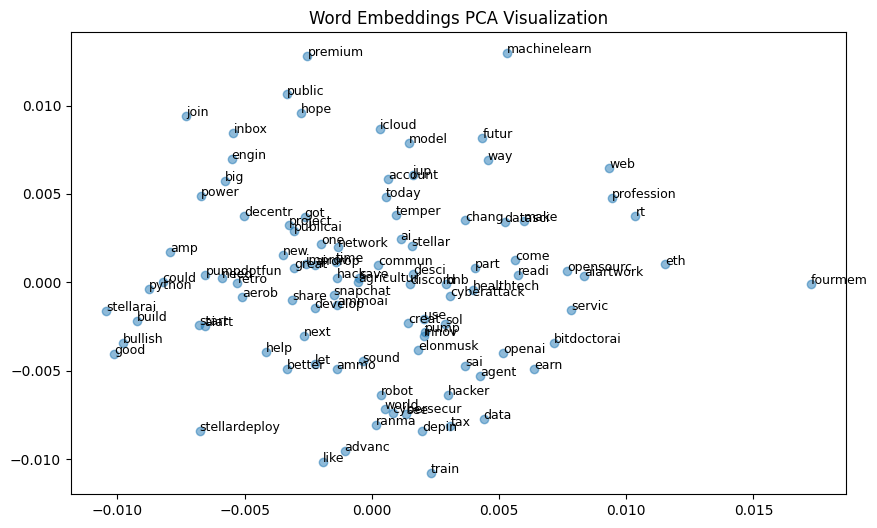

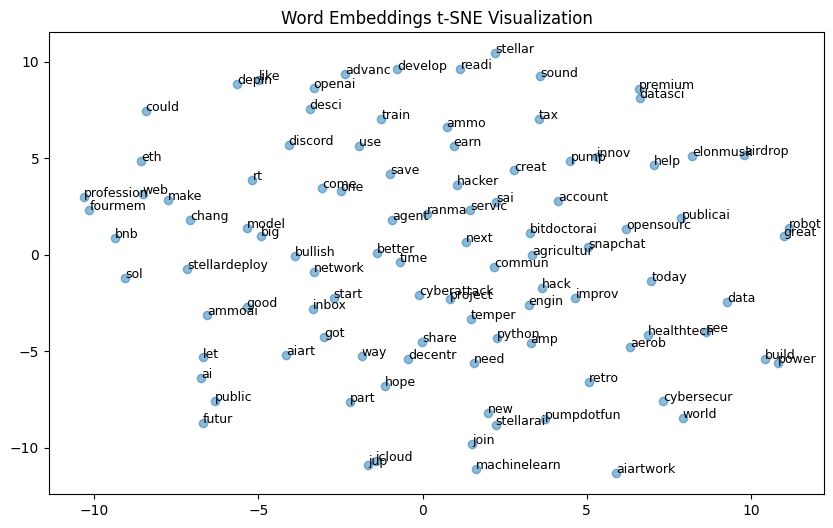

In [22]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import numpy as np

# Get word vectors
words = list(model.wv.index_to_key)[:100]  # Take the top 100 words for visualization
word_vectors = np.array([model.wv[word] for word in words])

# PCA Visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(word_vectors)

plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5)
for i, word in enumerate(words):
    plt.annotate(word, (pca_result[i, 0], pca_result[i, 1]), fontsize=9)
plt.title("Word Embeddings PCA Visualization")
plt.show()

# t-SNE Visualization
tsne = TSNE(n_components=2, perplexity=15, random_state=42)
tsne_result = tsne.fit_transform(word_vectors)

plt.figure(figsize=(10, 6))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], alpha=0.5)
for i, word in enumerate(words):
    plt.annotate(word, (tsne_result[i, 0], tsne_result[i, 1]), fontsize=9)
plt.title("Word Embeddings t-SNE Visualization")
plt.show()


In [23]:
#(3) Calculate the cosine similarity between a few pairs of words to see if the model captures semantic similarity accurately.

In [24]:
from numpy import dot
from numpy.linalg import norm

# Function to compute cosine similarity
def cosine_similarity(word1, word2):
    vec1 = model.wv[word1]
    vec2 = model.wv[word2]
    return dot(vec1, vec2) / (norm(vec1) * norm(vec2))

# Example word pairs
word_pairs = [("ai", "artificial"), ("elonmusk", "tesla"), ("good", "bad")]

# Compute similarity
for word1, word2 in word_pairs:
    if word1 in model.wv and word2 in model.wv:
        sim = cosine_similarity(word1, word2)
        print(f"Cosine Similarity between '{word1}' and '{word2}': {sim:.4f}")
    else:
        print(f"Words '{word1}' or '{word2}' not in vocabulary.")


Words 'ai' or 'artificial' not in vocabulary.
Words 'elonmusk' or 'tesla' not in vocabulary.
Cosine Similarity between 'good' and 'bad': -0.0197


In [25]:
from scipy.spatial.distance import cosine
# Function to compute cosine similarity with case handling
def cosine_similarity(word1, word2):
    word1 = word1.lower()
    word2 = word2.lower()

    # Check if the word exists in the model
    if word1 in model.wv and word2 in model.wv:
        return 1 - cosine(model.wv[word1], model.wv[word2])
    else:
        return None

# Example word pairs
word_pairs = [("AI", "technology"), ("machine", "learning"), ("text", "processing")]

# Compute and display similarity scores
for word1, word2 in word_pairs:
    similarity = cosine_similarity(word1, word2)
    if similarity is not None:
        print(f"Cosine Similarity between '{word1}' and '{word2}': {similarity:.4f}")
    else:
        print(f"One or both words ('{word1}', '{word2}') are not present in the vocabulary.")



One or both words ('AI', 'technology') are not present in the vocabulary.
One or both words ('machine', 'learning') are not present in the vocabulary.
One or both words ('text', 'processing') are not present in the vocabulary.


## Question 4 (20 Points)

**Create your own training and evaluation data for sentiment analysis.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.




1.   Which NLP Task you would like perform on your selected dataset
(NER, Summarization, Sentiment Analysis, Text classficication)
2.  Explain your labeling Schema you have used and mention those labels

3.  You can take AI assistance for labeling the data only.



In [26]:
# 1. NLP Task: I am performing Sentiment Analysis on the dataset to determine the sentiment of each tweet as Positive, Negative, or Neutral based on the text content.

# 2. Labeling Schema:

# Positive: Tweets expressing optimism, praise, excitement, or support.
# Negative: Tweets showing criticism, frustration, complaints, or negative emotions.
# Neutral: Tweets that are factual, ambiguous, or lack strong emotions.

# 3. AI Assistance: I used AI (VADER Sentiment Analyzer) to label the data based on sentiment scores. The compound score determines the sentiment:

# Score ≥ 0.05 → Positive
# Score ≤ -0.05 → Negative
# Otherwise → Neutra

In [27]:
# The GitHub link of your final csv file



# Link: https://github.com/Asmitapatel19/AsmitabenSandipbhai_INFO5731_Spring2025/blob/main/annoted_sentiments.xlsx



# Mandatory Question

Provide your thoughts on the assignment by filling this survey link. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

In [28]:
# Type your answer
# I think the question 1 and 2 were quite easy to understand and complete but 3rd question was a bit challenging for me as we need to create a word embedding model.